# Table of Content

1) Importing the Libraries

2) Loading the Data

3) Clear the Data

4) Categorical Analysis

5) Numerical Analysis

6) Bivariate Analysis

7) Conclusion

## Importing the Libraries

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import OrdinalEncoder

import warnings
warnings.filterwarnings("ignore")

## Loading the Data

In [2]:
df=pd.read_csv('/kaggle/input/lifestyle-factors-and-their-impact-on-students/student_lifestyle_dataset..csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 9 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Student_ID                       2000 non-null   int64  
 1   Study_Hours_Per_Day              2000 non-null   float64
 2   Extracurricular_Hours_Per_Day    2000 non-null   float64
 3   Sleep_Hours_Per_Day              2000 non-null   float64
 4   Social_Hours_Per_Day             2000 non-null   float64
 5   Physical_Activity_Hours_Per_Day  2000 non-null   float64
 6   Stress_Level                     2000 non-null   object 
 7   Gender                           2000 non-null   object 
 8   Grades                           2000 non-null   float64
dtypes: float64(6), int64(1), object(2)
memory usage: 140.8+ KB


## Clear the Data

Check null values:

In [3]:
df.isnull().sum()

Student_ID                         0
Study_Hours_Per_Day                0
Extracurricular_Hours_Per_Day      0
Sleep_Hours_Per_Day                0
Social_Hours_Per_Day               0
Physical_Activity_Hours_Per_Day    0
Stress_Level                       0
Gender                             0
Grades                             0
dtype: int64

Check duplicated values:

In [4]:
df.duplicated().sum()

0

Deleting columns that we don't need:

In [5]:
df.drop(columns=['Student_ID'],inplace=True)

Let's seperate numerical and categorical data:

In [6]:
cat_features=df.select_dtypes(include=['object']).columns
num_features=df.select_dtypes(include=['int64', 'float64']).columns

## Categorical Analysis

In [7]:
for i in cat_features:
    print(f'{i} : {df[i].nunique()}\n{df[i].unique()}\n')

Stress_Level : 3
['Moderate' 'Low' 'High']

Gender : 2
['Male' 'Female']



- Stress_Level is my target in this dataset

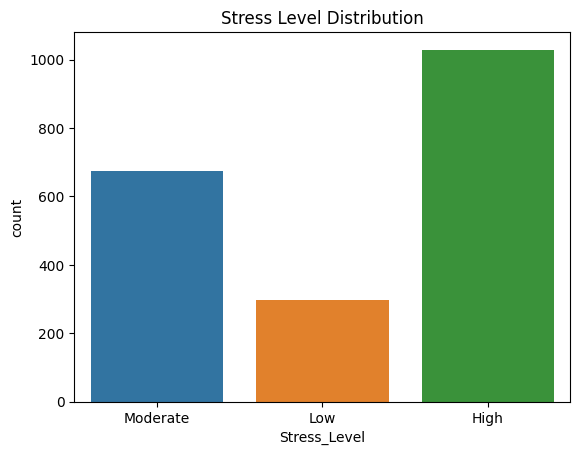

In [8]:
plt.figure()
sns.countplot(data=df,x='Stress_Level')
plt.title('Stress Level Distribution')
plt.show()

### Observations on Stress Levels

- A **significant proportion** of the dataset exhibits **high stress levels**.
- This suggests that stress is a prevalent issue among students and may be influenced by various lifestyle factors.
- Further analysis is needed to determine the key contributors to **high stress**, such as study hours, sleep duration, and extracurricular activities.

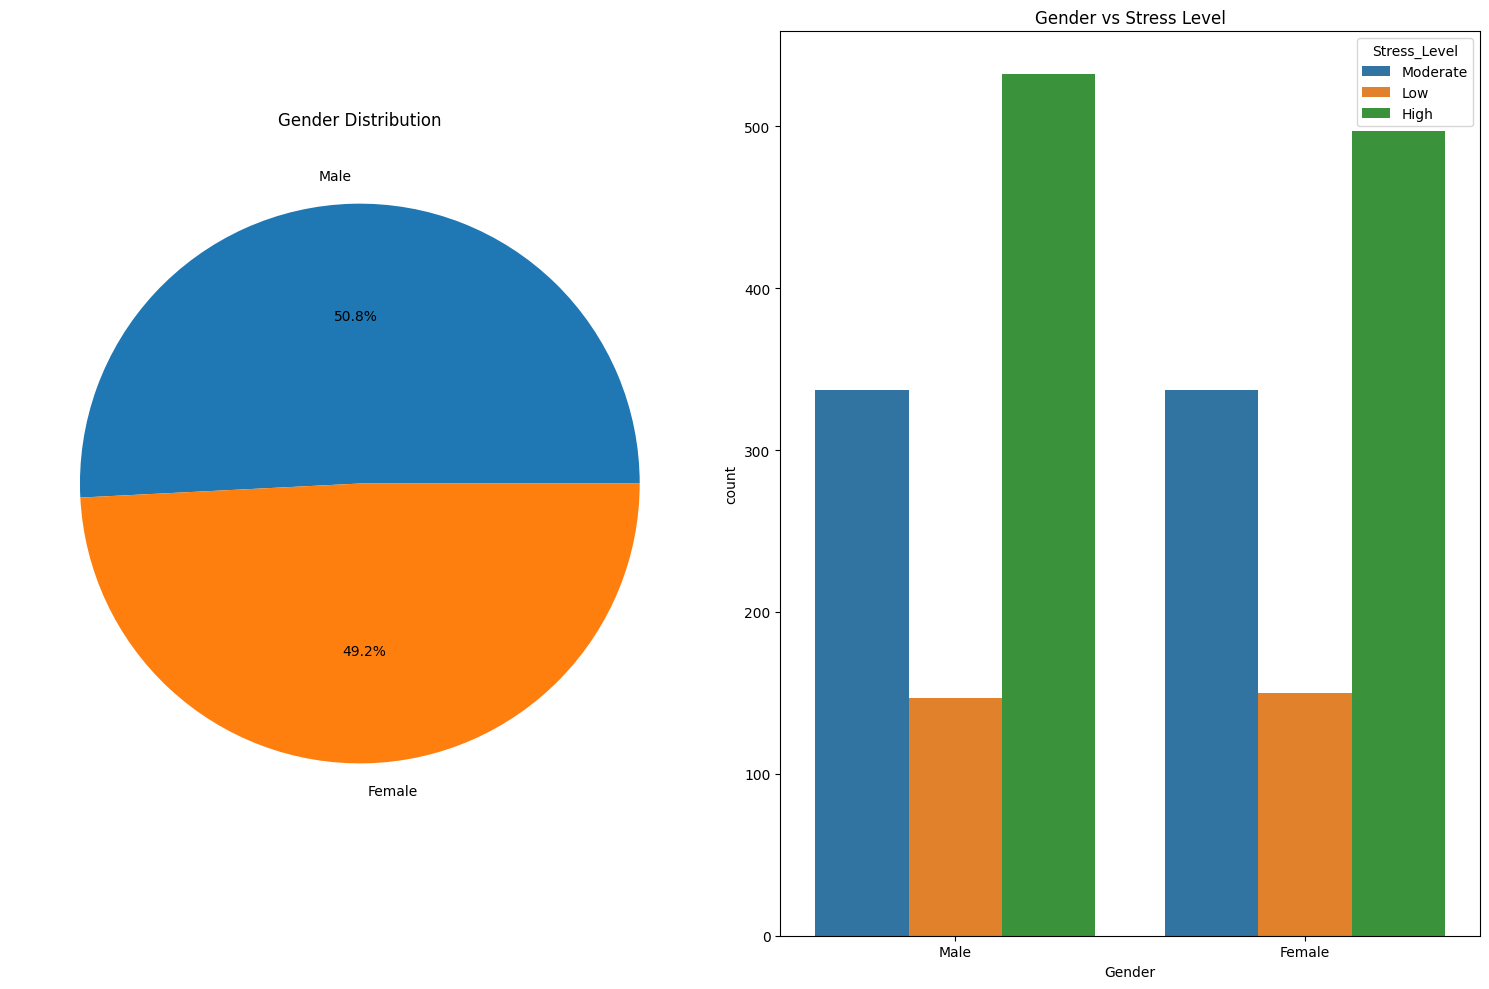

In [9]:
fig,ax=plt.subplots(1, 2, figsize=(15, 10))
ax[0].pie(df[i].value_counts(), labels=df[i].value_counts().index, autopct='%1.1f%%')
sns.countplot(x='Gender',hue='Stress_Level', data=df, ax=ax[1])    

ax[0].set_title('Gender Distribution')
ax[1].set_title('Gender vs Stress Level')
plt.tight_layout()
plt.show()

### Gender Distribution in Relation to Stress Levels

- The distribution of **Male** and **Female** students is nearly equal.
- When comparing **Gender** and **Stress Level**, we observe that for *Low* and *Moderate* stress levels, the proportion of male and female students is almost the same.
- However, in the *High* stress category, there are  higher numbers of **Female** students compared to **Male** students.

## Numerical Analysis

In [10]:
for i in num_features:
    print(f'{i} : {df[i].nunique()}')

Study_Hours_Per_Day : 51
Extracurricular_Hours_Per_Day : 41
Sleep_Hours_Per_Day : 51
Social_Hours_Per_Day : 61
Physical_Activity_Hours_Per_Day : 118
Grades : 158


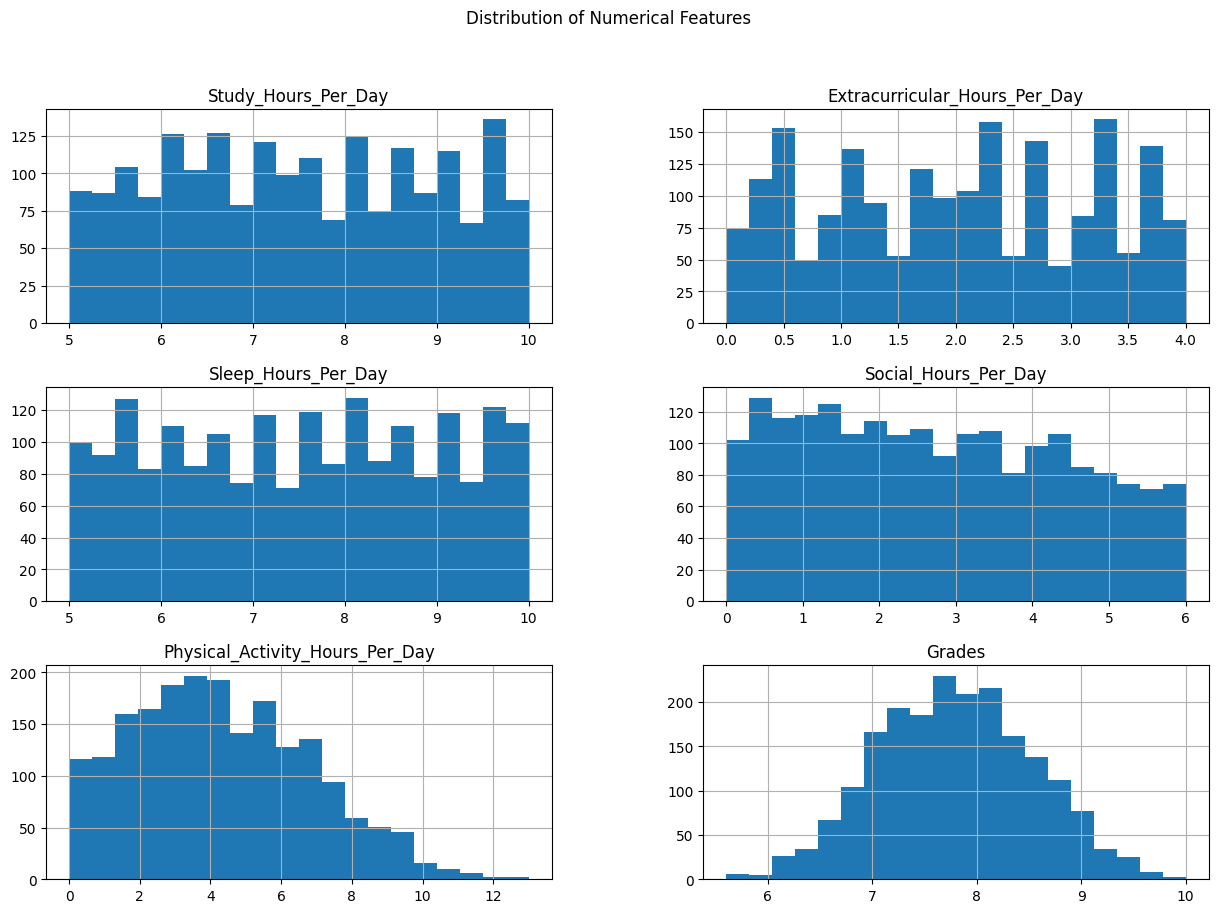

In [11]:
df[num_features].hist(figsize=(15, 10), bins=20)
plt.suptitle("Distribution of Numerical Features")
plt.show()

### Observations on Student Lifestyle Factors

- **Study Hours Per Day** range between **5 to 10 hours**.
- **Extracurricular Hours Per Day** vary between **0 to 4 hours**, with a **notable number of students engaging in more than 3 hours**, which may contribute to academic pressure.
- **Social Hours Per Day** range from **0 to 6 hours**, but a **significant number of students experience only 0 to 30 minutes of social interaction daily**, which may negatively impact their well-being.
- **Sleep Duration** is concerning, as a **noticeable portion of students sleep only between 5 to 6 hours per day**, which is insufficient for optimal health and cognitive function.
- **Physical Activity Per Day** is present among most students, which is beneficial. However, **some students engage in either zero or more than 8 hours of physical activity**, which could be harmful.
- **Grade Distribution** is predominantly at a **mid-level**, suggesting that academic performance is relatively balanced across the dataset.

In [12]:
for i in num_features:
    print(f'{i}: {np.round(df[i].skew(),3)}')

Study_Hours_Per_Day: 0.035
Extracurricular_Hours_Per_Day: 0.001
Sleep_Hours_Per_Day: -0.007
Social_Hours_Per_Day: 0.184
Physical_Activity_Hours_Per_Day: 0.399
Grades: 0.028


- Data is not skewed wich is a very good sign.

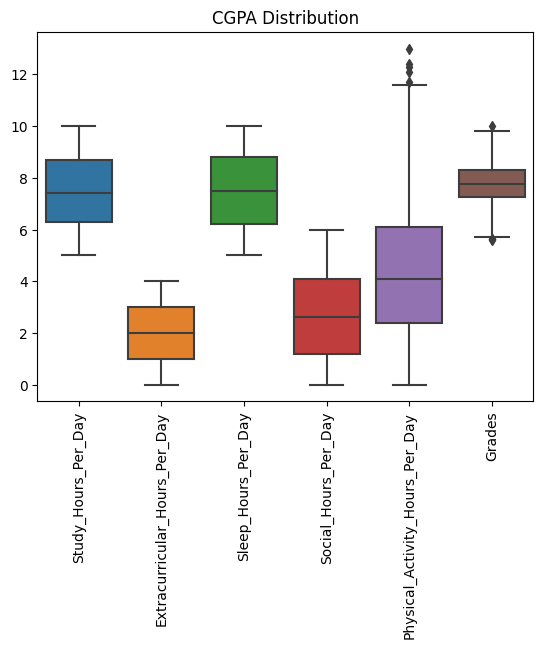

In [14]:
sns.boxplot(data=df)
plt.title("CGPA Distribution")
plt.xticks(rotation=90)
plt.show()

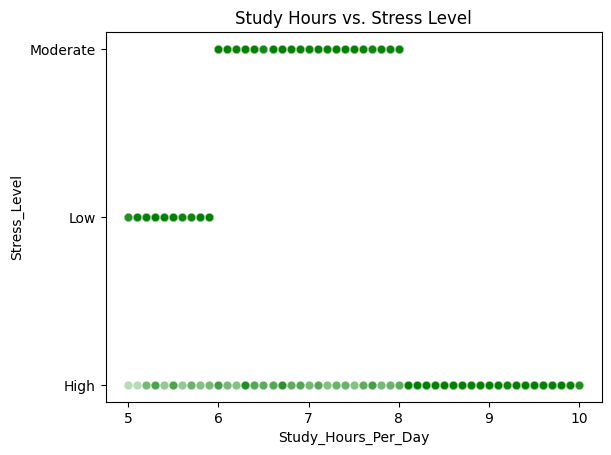

In [15]:
sns.scatterplot(data=df, x="Study_Hours_Per_Day", y="Stress_Level",alpha=0.1,color='green')
plt.title("Study Hours vs. Stress Level")
plt.show()

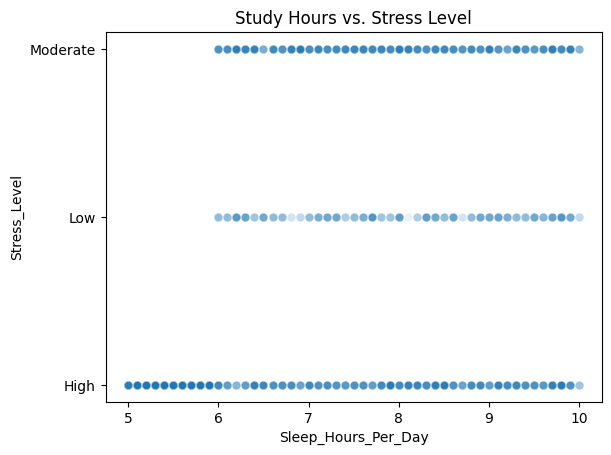

In [16]:
sns.scatterplot(data=df, x="Sleep_Hours_Per_Day", y="Stress_Level",alpha=0.1)
plt.title("Study Hours vs. Stress Level")
plt.show()

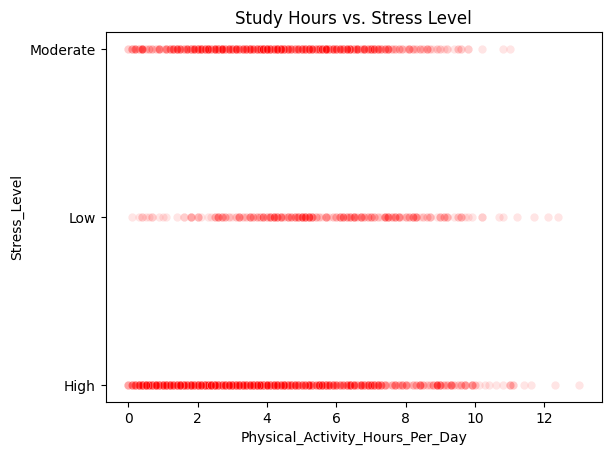

In [17]:
sns.scatterplot(data=df, x="Physical_Activity_Hours_Per_Day", y="Stress_Level",alpha=0.1,color='red')
plt.title("Study Hours vs. Stress Level")
plt.show()

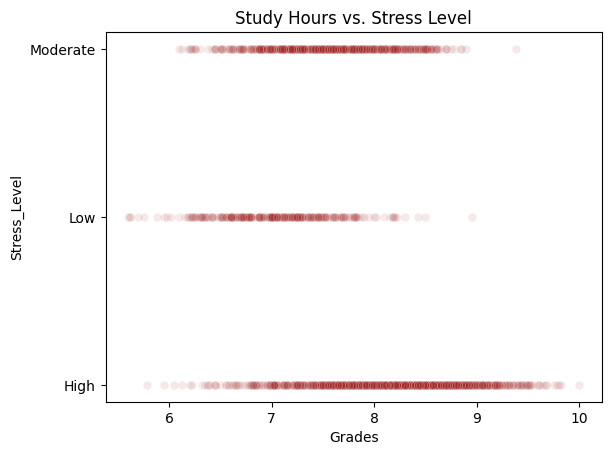

In [18]:
sns.scatterplot(data=df, x="Grades", y="Stress_Level",alpha=0.1,color='brown')
plt.title("Study Hours vs. Stress Level")
plt.show()

### Key Observations on Stress Levels

- **Increasing Study Hours** tends to be associated with **higher stress levels**. However, since high stress is prevalent across the dataset, study hours alone **do not fully explain** the stress levels—other contributing factors must be considered.
- **Reduced Sleep Duration** clearly correlates with **higher stress levels**, reinforcing the importance of sufficient rest for students.
- **Students with higher grades** generally experience **greater stress**, whereas students with lower grades appear to report **lower stress levels** more frequently.
- **Very high levels of physical activity** are generally linked to **lower stress**, suggesting that exercise may act as a stress reliever.

## Bivariate Analysis

For deeper analysis we convert categorical data to numerical.

In [19]:
encoder=OrdinalEncoder()

encoded_cat=encoder.fit_transform(df[cat_features])
encoded_cat_df=pd.DataFrame(encoded_cat, columns=cat_features,index=df.index)

encoded_full_df=pd.concat([df[num_features],encoded_cat_df],axis=1)
encoded_full_df.head()

,Study_Hours_Per_Day,Extracurricular_Hours_Per_Day,Sleep_Hours_Per_Day,Social_Hours_Per_Day,Physical_Activity_Hours_Per_Day,Grades,Stress_Level,Gender
0,6.9,3.8,8.7,2.8,1.8,7.48,2.0,1.0
1,5.3,3.5,8.0,4.2,3.0,6.88,1.0,0.0
2,5.1,3.9,9.2,1.2,4.6,6.68,1.0,1.0
3,6.5,2.1,7.2,1.7,6.5,7.20,2.0,1.0
4,8.1,0.6,6.5,2.2,6.6,8.78,0.0,1.0


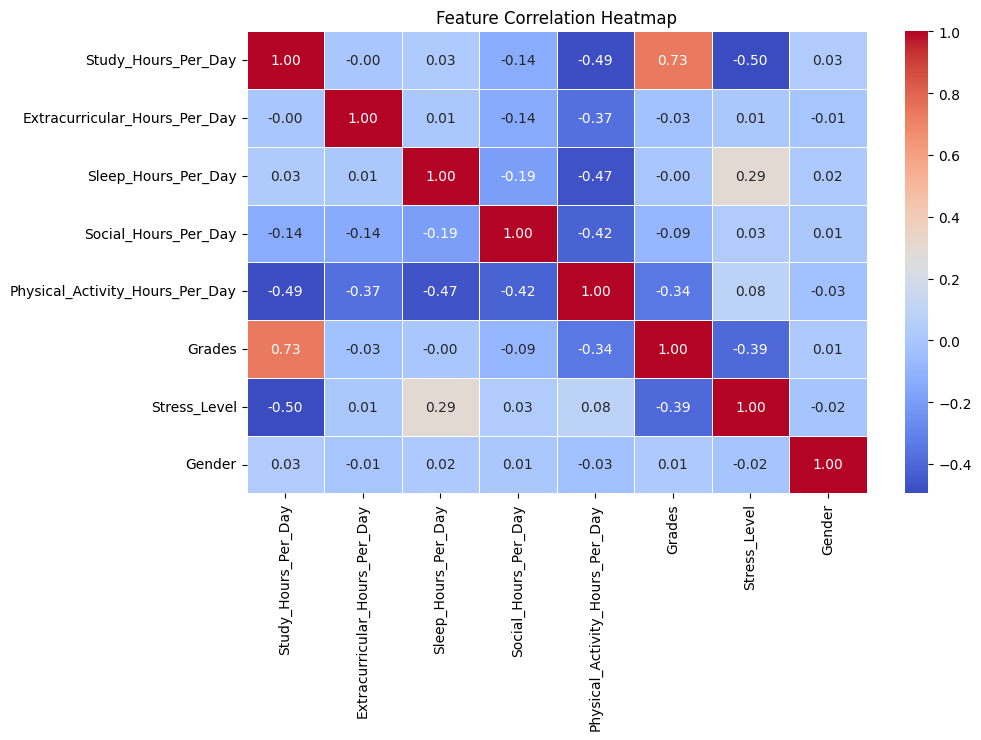

In [20]:
corr_matrix = encoded_full_df.corr()

plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()

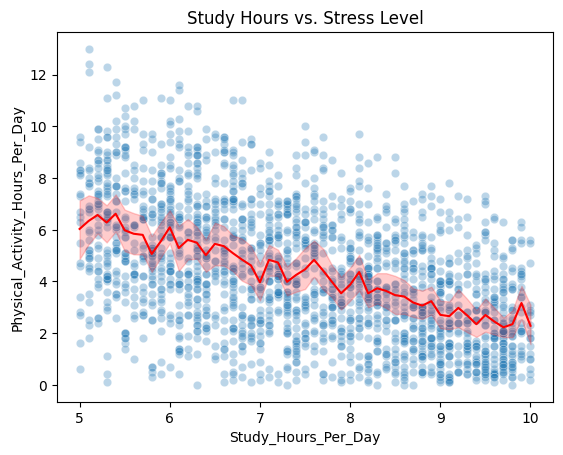

In [23]:
sns.scatterplot(data=df, x="Study_Hours_Per_Day", y="Physical_Activity_Hours_Per_Day",alpha=0.3)
sns.lineplot(data=df, x="Study_Hours_Per_Day", y="Physical_Activity_Hours_Per_Day", color="red")

plt.title("Study Hours vs. Stress Level")
plt.show()

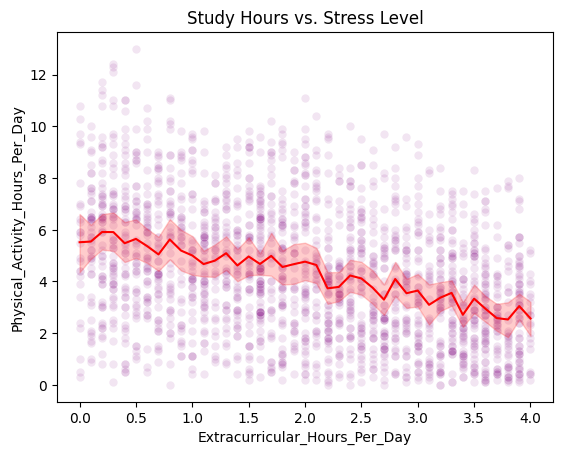

In [24]:
sns.scatterplot(data=df, x="Extracurricular_Hours_Per_Day", y="Physical_Activity_Hours_Per_Day",alpha=0.1,color='purple')
sns.lineplot(data=df, x="Extracurricular_Hours_Per_Day", y="Physical_Activity_Hours_Per_Day", color="red")

plt.title("Study Hours vs. Stress Level")
plt.show()

- As **study hours per day** increase, **physical activity per day** tends to decrease, indicating a **moderately strong negative correlation**. This suggests that students who dedicate more time to studying may compromise their physical activity.
- **Extracurricular hours per day** show a **moderate negative correlation** with **physical activity per day**, implying that students engaged in extracurricular activities may have limited time for exercise.

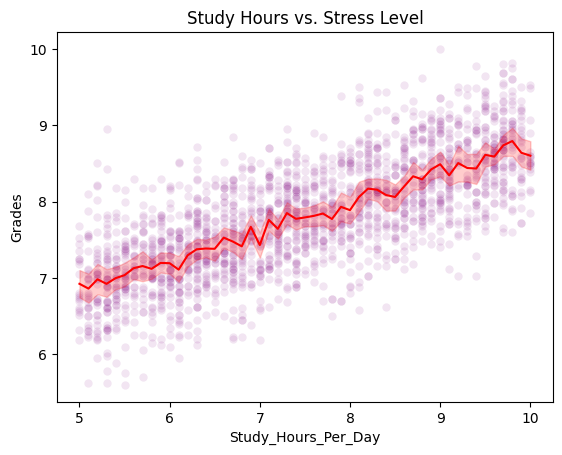

In [25]:
sns.scatterplot(data=df, x="Study_Hours_Per_Day", y="Grades",alpha=0.1,color='purple')
sns.lineplot(data=df, x="Study_Hours_Per_Day", y="Grades", color="red")

plt.title("Study Hours vs. Stress Level")
plt.show()

- A **strong positive correlation** exists between **grades** and **study hours per day**.
- This suggests that students who dedicate more time to studying tend to achieve **higher academic performance**.

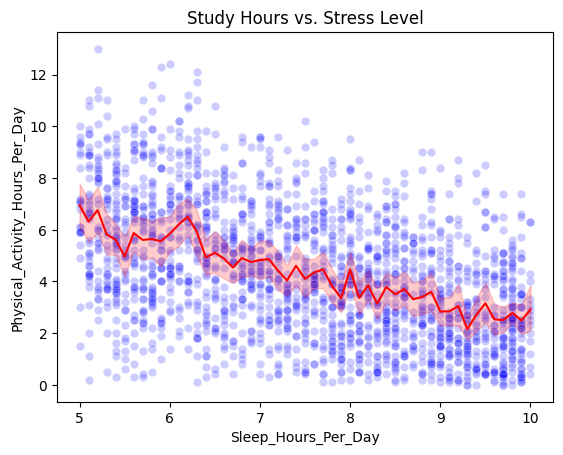

In [26]:
sns.scatterplot(data=df, x="Sleep_Hours_Per_Day", y="Physical_Activity_Hours_Per_Day",alpha=0.2,color='blue')
sns.lineplot(data=df, x="Sleep_Hours_Per_Day", y="Physical_Activity_Hours_Per_Day", color="red")

plt.title("Study Hours vs. Stress Level")
plt.show()

- There is a **moderate negative correlation** between **sleep hours** and **physical activity per day**.
- This suggests that students who engage in **higher levels of physical activity** may tend to sleep **fewer hours**.

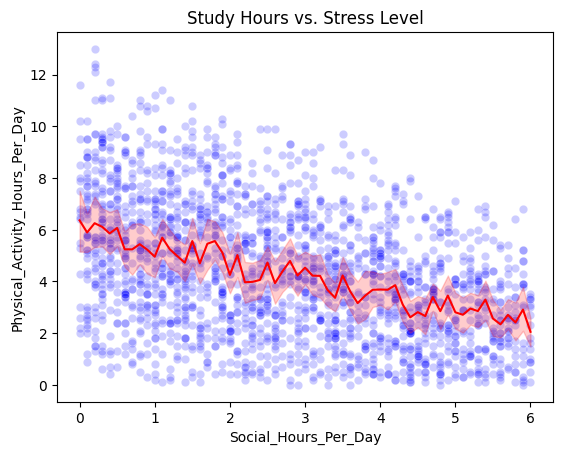

In [27]:
sns.scatterplot(data=df, x="Social_Hours_Per_Day", y="Physical_Activity_Hours_Per_Day",alpha=0.2,color='blue')
sns.lineplot(data=df, x="Social_Hours_Per_Day", y="Physical_Activity_Hours_Per_Day", color="red")

plt.title("Study Hours vs. Stress Level")
plt.show()

- There is a **moderate negative correlation** between **social hours per day** and **physical activity hours per day**.
- This suggests that students who spend more time on social interactions may engage in less physical activity.

---
- The above analysis focused on **linear relationships** between variables.
- However, **more complex patterns** may be present in the data, which can be uncovered using **non-linear methods**.

### 1. High Stress Levels Among Students
- A **significant proportion** of students experience **high stress levels**, indicating that stress is a widespread issue.
- Stress is **not solely triggered by study hours**, suggesting the presence of **multiple contributing lifestyle factors** such as **sleep patterns, extracurricular activities, and social interactions**.

### 2. Gender-Based Stress Trends
- The distribution of **Male** and **Female** students is almost equal.
- **Low and Moderate stress levels** are evenly distributed between genders.
- However, in the **High stress category**, there is a **notably larger number of Female students** compared to Males.

### 3. Impact of Lifestyle Factors on Stress
- **Study Hours Per Day** range between **5 to 10 hours**, with a **strong positive correlation with grades**.
- **Extracurricular Hours Per Day** vary between **0 to 4 hours**, but students spending **more than 3 hours** in extracurricular activities may experience increased pressure.
- **Social Hours Per Day** are **very low for a significant number of students**, which may have negative effects on well-being.
- **Sleep Duration** is insufficient for many students, with **5 to 6 hours of sleep** being common, potentially contributing to **higher stress levels**.
- **Physical Activity Per Day** is mostly balanced, but students with **zero or excessive activity (above 8 hours)** might face health risks.
- **Grade Distribution** remains **mid-level**, indicating a balanced academic performance across the dataset.

### 4. Key Correlations in Student Habits
- **Higher study hours correlate strongly with higher grades**, but **do not entirely explain stress levels**.
- **Lack of sleep is a clear contributor to increased stress**.
- **Students with higher grades tend to experience more stress**, while **students with lower grades show lower stress levels**.
- **High levels of physical activity generally reduce stress**, suggesting exercise acts as a **stress reliever**.
- **Study hours negatively correlate with physical activity**, meaning students who study more tend to exercise less.
- **Extracurricular hours moderately negatively correlate with physical activity**, indicating students with **many extracurricular activities may have less time for exercise**.
- **Social hours negatively correlate with physical activity**, meaning students who **spend more time on social interactions engage less in exercise**.
- **Sleep duration negatively correlates with physical activity**, showing that students who are **more physically active may sleep fewer hours**.

### 5. Moving Beyond Linear Analysis
- The analysis primarily explored **linear relationships** between factors.
- However, **more complex patterns may exist** that require **non-linear techniques** such as **decision trees, clustering, or machine learning models** for deeper insights.
- Future studies could incorporate **non-linear methods** to reveal **hidden trends** affecting stress and academic performance.